In [4]:
from qiskit import QuantumCircuit
import numpy as np

def qft(n):
    qc = QuantumCircuit(n)
    
    # Apply the QFT
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            angle = np.pi / 2**(j - i)
            qc.cp(angle, j, i)  # Controlled phase gate
            
    # Swap the qubits to reverse the order
    for i in range(n // 2):
        qc.swap(i, n - i - 1)
    
    qc.name = "QFT"
    return qc


In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np

n = 4
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr)

# — Example: initialize a custom state whose Fourier transform has non‐uniform magnitudes
vec = np.array([1 for _ in range(n ** 2)])      # input “signal”
vec = vec / np.linalg.norm(vec)   # normalize
qc.initialize(vec, qr)            # amplitude‐encode your data

for i in range(n):
    qc.h(i)
    for j in range(i+1, n):
        angle = np.pi/2**(j - i)
        qc.cp(angle, j, i)         # controlled phase, not crx?

state = Statevector.from_instruction(qc)
print("Output amplitudes:", state.data)


Output amplitudes: [ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -5.59278579e-18-1.35021793e-17j  0.00000000e+00+0.00000000e+00j
  1.62588398e-17+1.62588398e-17j  0.00000000e+00+0.00000000e+00j
 -5.59278579e-18-2.31660773e-18j  0.00000000e+00+0.00000000e+00j
  6.22328532e-19+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -5.59278579e-18+2.31660773e-18j  0.00000000e+00+0.00000000e+00j
  1.62588398e-17-1.62588398e-17j  0.00000000e+00+0.00000000e+00j
 -5.59278579e-18+1.35021793e-17j  0.00000000e+00+0.00000000e+00j]


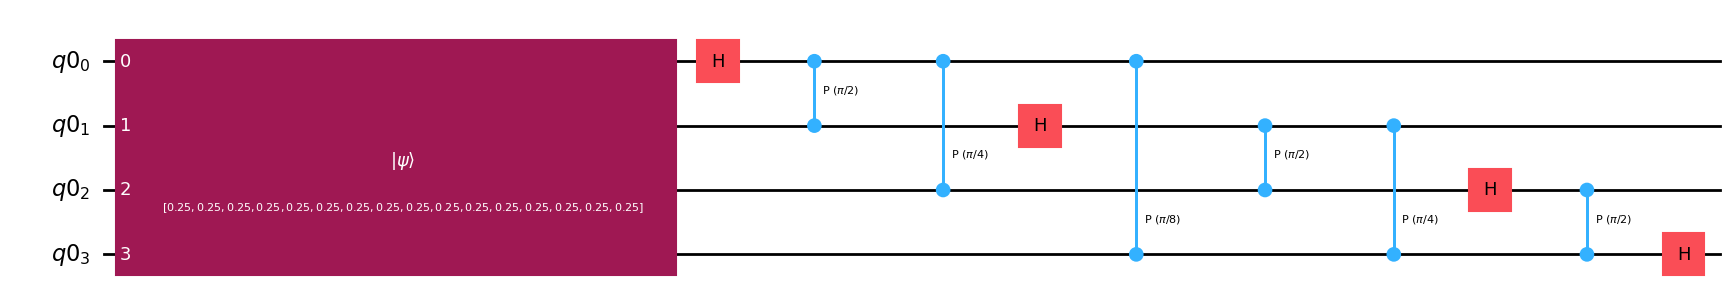

In [2]:
qc.draw("mpl")

In [9]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer.primitives import Sampler

n = 3
qr = QuantumRegister(n, "q")
cr = ClassicalRegister(n, "c")
qc = QuantumCircuit(qr, cr)

x = 1
for bit in range(n):
    if (x >> bit) & 1:
        qc.x(qr[bit])

for i in range(n):
    qc.h(qr[i])
    for j in range(i+1, n):
        angle = np.pi/2**(j - i)
        qc.cp(angle, qr[j], qr[i])

state = Statevector.from_instruction(qc)
print("Output amplitudes:", state.data)

for i in reversed(range(n)):
    for j in reversed(range(i+1, n)):
        angle = -np.pi/2**(j - i)
        qc.cp(angle, qr[j], qr[i])  
    qc.h(qr[i])

qc.measure(qr, cr)

sampler = Sampler()
job     = sampler.run(qc)
result  = job.result()
quasi   = result.quasi_dists[0]

print("Quasi-probability distribution:")
print(quasi)

Output amplitudes: [ 0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j
  0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j]
Quasi-probability distribution:
{1: 1.0}


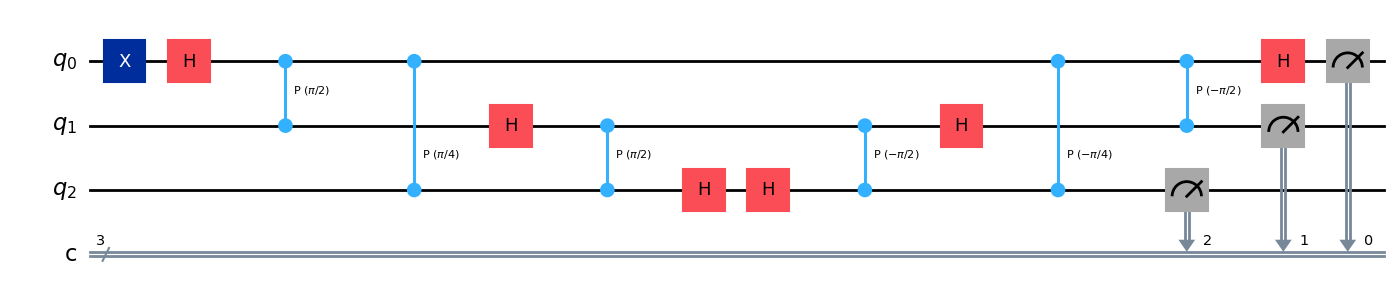

In [10]:
qc.draw("mpl")